In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,\
auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve, r2_score, mean_squared_error
import time

In [4]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_covid19_data.csv to synthetic_covid19_data.csv


In [5]:
pd.read_csv("synthetic_covid19_data.csv")

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-11-09,Asia,France,7085904,1537,380572,854,38716025,79552,0.197973,...,98.890603,629900904,764.616886,33.458451,10.699616,9.350358,2098.653639,4.346562,493.921655,6.836992
2996,2020-01-24,North America,India,6699744,397,277354,353,27906787,38233,0.920767,...,26.402506,970688939,691.752546,43.324178,15.298106,8.681226,4533.613663,30.872835,438.493670,17.708803
2997,2021-02-08,Asia,France,9024327,5680,442726,74,88886044,22695,0.441796,...,16.666702,146193923,650.365284,31.532917,11.588981,19.658565,63901.494497,16.760837,777.073028,3.726194
2998,2020-02-05,Asia,India,2801445,9355,364225,801,63500569,90488,0.742791,...,54.633328,485038295,552.083660,26.648227,5.098328,10.351321,25728.132347,33.450083,198.230609,11.864297


In [7]:
# Load the data into df
df = pd.read_csv("synthetic_covid19_data.csv")

# backup copy
df_original = df.copy()

In [8]:
df.head()


,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [9]:
df.tail()


,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
2995,2022-11-09,Asia,France,7085904,1537,380572,854,38716025,79552,0.197973,...,98.890603,629900904,764.616886,33.458451,10.699616,9.350358,2098.653639,4.346562,493.921655,6.836992
2996,2020-01-24,North America,India,6699744,397,277354,353,27906787,38233,0.920767,...,26.402506,970688939,691.752546,43.324178,15.298106,8.681226,4533.613663,30.872835,438.493670,17.708803
2997,2021-02-08,Asia,France,9024327,5680,442726,74,88886044,22695,0.441796,...,16.666702,146193923,650.365284,31.532917,11.588981,19.658565,63901.494497,16.760837,777.073028,3.726194
2998,2020-02-05,Asia,India,2801445,9355,364225,801,63500569,90488,0.742791,...,54.633328,485038295,552.083660,26.648227,5.098328,10.351321,25728.132347,33.450083,198.230609,11.864297
2999,2021-06-21,Europe,Canada,9196866,4825,169746,928,48153647,42734,0.546996,...,55.189039,502986611,484.403500,28.728532,5.813562,14.526652,21578.044401,28.410705,480.571347,10.892834


In [10]:
df.shape

(3000, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     3000 non-null   object 
 1   continent                3000 non-null   object 
 2   location                 3000 non-null   object 
 3   total_cases              3000 non-null   int64  
 4   new_cases                3000 non-null   int64  
 5   total_deaths             3000 non-null   int64  
 6   new_deaths               3000 non-null   int64  
 7   total_tests              3000 non-null   int64  
 8   new_tests                3000 non-null   int64  
 9   positive_rate            3000 non-null   float64
 10  tests_per_case           3000 non-null   float64
 11  total_vaccinations       3000 non-null   int64  
 12  people_vaccinated        3000 non-null   int64  
 13  people_fully_vaccinated  3000 non-null   int64  
 14  hosp_patients           

In [34]:
df.total_deaths.value_counts()

,count
total_deaths,
313572,2
361417,2
157255,2
58560,2
46015,2
...,...
391351,1
26505,1
36713,1


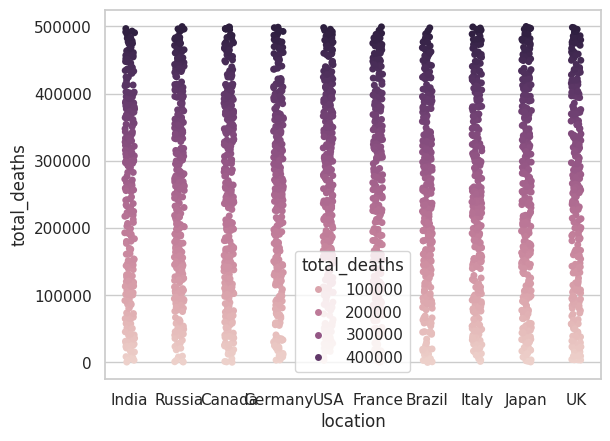

In [44]:
#Checking for outliers
sns.stripplot(data = df,
             x= "location",
             y = "total_deaths",
             hue = 'total_deaths',
             legend = True)
plt.show()

<Figure size 1400x800 with 0 Axes>

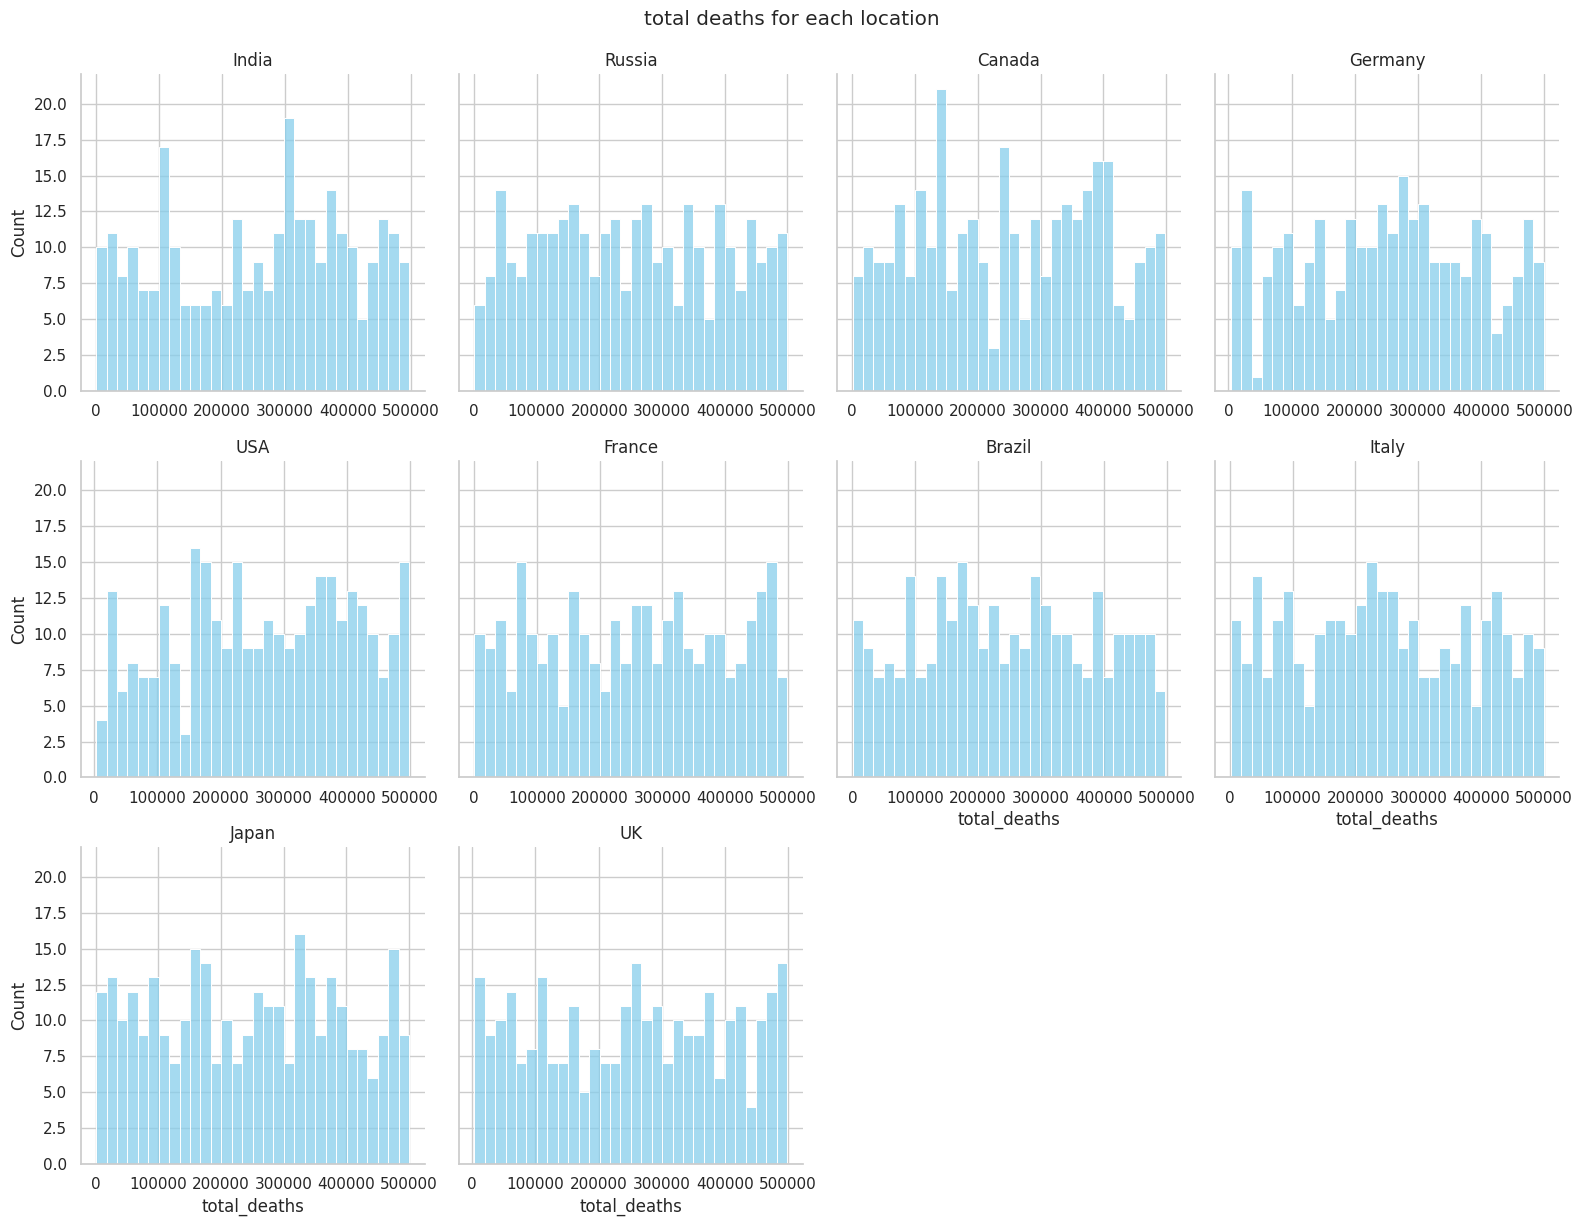

In [37]:
continent_multiple = df.copy()

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each location
# Changed 'location_multiple' to 'continent_multiple' to use the defined dataframe
g = sns.FacetGrid(continent_multiple, col="location", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "total_deaths", kde=False, bins=30, color='skyblue')

g.set_axis_labels("total_deaths", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("total deaths for each location", y=1.02)

plt.show()

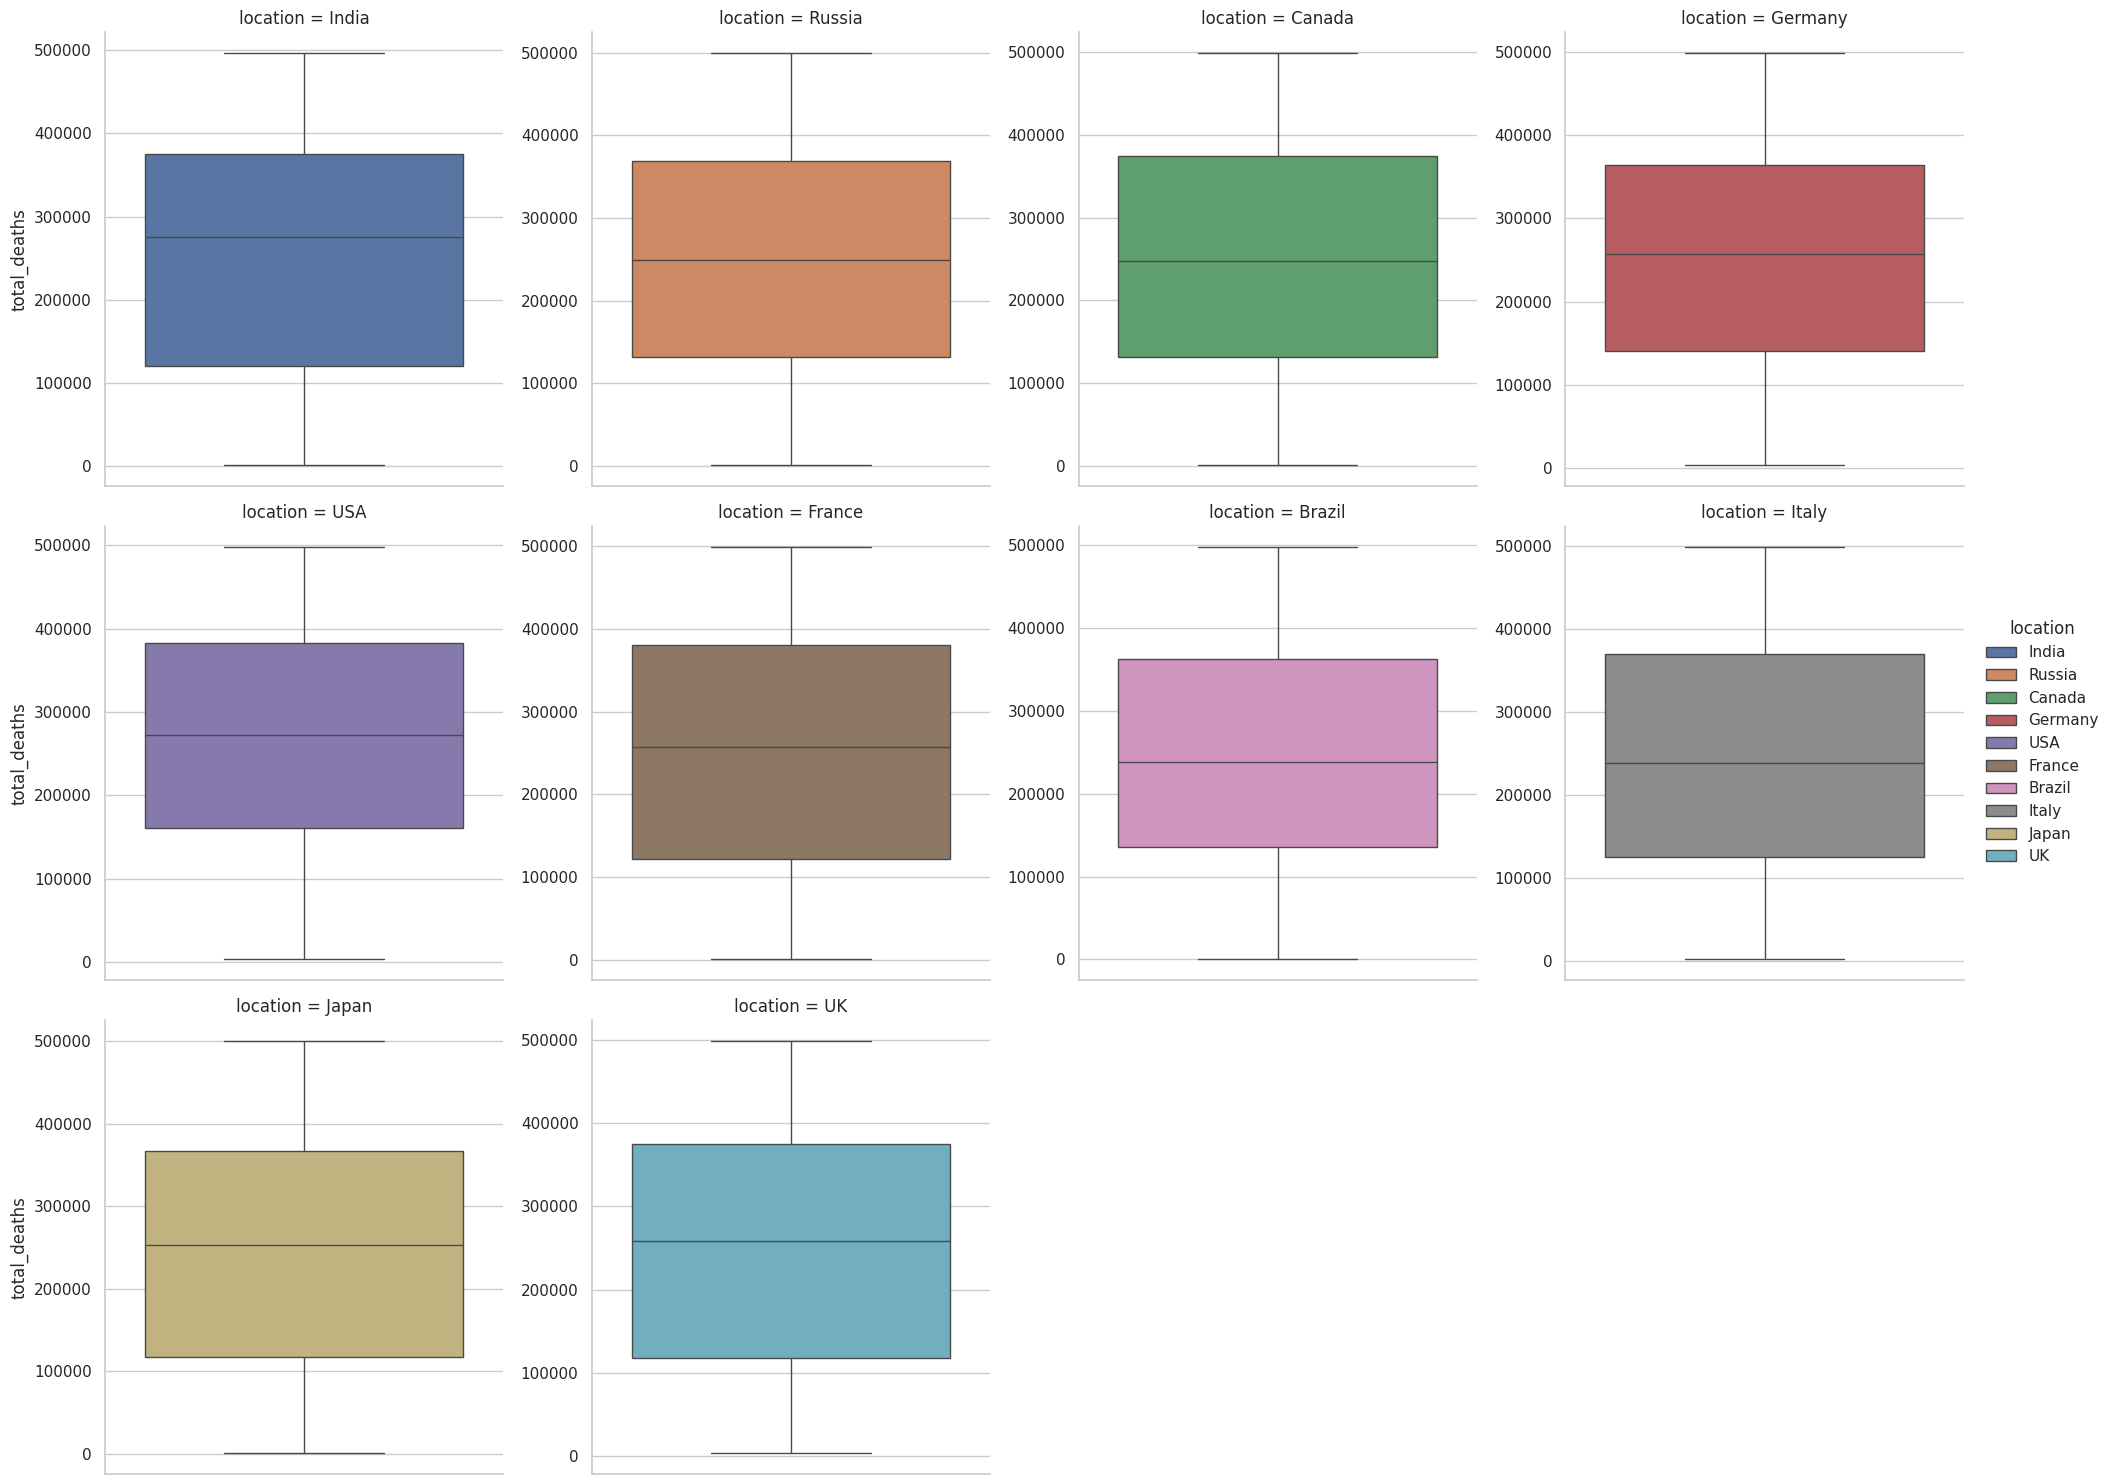

In [48]:
sns.catplot(data = continent_multiple,
            y = "total_deaths",
            kind = "box",
            col = 'location',
            hue = 'location',
           col_wrap =4,
           sharey=False)

plt.show()